# **Inteligência Artificial e Computacional – Sprint 3**
## **Conteúdo: expandindo o uso de IA para dados de texto**

Construir um script Jupyter notebook que carregue dados no formato de texto relacionado ao domínio automotivo. 

Esses dados podem ser obtidos da internet ou gerados pelo grupo, desde que sejam coerentes; os dados podem estar agrupados em arquivos .txt, .csv, e/ou .excel. 

Trate os dados, quando necessário, para que estejam nas representações adequadas usando Processamento de Linguagem Natural (Bag of Words, Word2Vec, entre outras).  

Aplique pelo menos:
- Uma técnica de Redução de Dimensionalidade;
- Uma de Agrupamento (Clustering); 
- Uma de Classificação (Classification) aos dados.

Gere gráficos pertinentes que mostrem o desempenho dos algoritmos usados para cada tarefa.  

Comente os resultados. 

**Atenção: NÃO é permitido o uso dos datasets vistos como exemplos nas aulas.**

---


### **Requisitos:**

Entregar os arquivos de dados usados;

Entregar arquivo do script no formato .ipynb;

---


#### **Conteúdo:**

Códigos em Python;

Comentários em Markdown;

O nome do arquivo deve ser rm_nome_challenge_ford2022.ipynb, onde rm e nome devem ser substituídos pelo rm e nome do representante do grupo que submeter o trabalho;

## Nome - Turma - RM

- Fabbio Augusto de Souza Moura Boli (3ECA) 84695
- Leandro de Jesus Luna (3ECA) 86492
- Pedro Velosa (3ECR) 84591
- Pedro Fernandes (3ECR) 84244

------------------------------------------------------

# Etapa 0: **Carregando as bibliotecas e tratamento inicial dos dados**

In [1]:
## Bibliotecas
# Para dados
import pandas as pd
import numpy as np

# Para criar o Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Para separar dados de treinamento e teste
from sklearn.model_selection import train_test_split

# Aprendizado de Máquina Supervisionado - Classificação
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Métricas de desempenho para a Classificação
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report, adjusted_rand_score, silhouette_score, accuracy_score

# Para gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Aprendizado de Máquina - Redução de dimensionalidade
from sklearn.decomposition import PCA, KernelPCA   
from sklearn.manifold import TSNE,  Isomap 
from sklearn.feature_selection import RFE

# Algoritmos de Agrupamento
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, AffinityPropagation, MeanShift, OPTICS
from sklearn.mixture import GaussianMixture

# Processamento de Linguagem Natural
import nltk
import spacy
from nltk.corpus import stopwords              
from nltk.tokenize import word_tokenize        
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

# Módulo de análise de sentimentos
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [2]:
# Monta o drive para utilização do Google Colab 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Dataset: https://www.kaggle.com/datasets/ankkur13/edmundsconsumer-car-ratings-and-reviews?resource=download&select=Scraped_Car_Review_ford.csv
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Sprints3/Scraped_Car_Review_ford.csv', lineterminator='\n') # Alterar path/caminho conforme necessidade.
data.head() # Exibe as informações inicias do dataset carregado.

,Unnamed: 0,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating\r
0,0,on 06/06/18 14:19 PM (PDT),Vicki,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,2006 Mustang GT,Doesn’t disappoint,5.0
1,1,on 08/12/17 06:06 AM (PDT),Tom,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,DREAM CAR,I bought mine 4/17 with 98K. Have been wantin...,3.0
2,2,on 06/15/17 05:43 AM (PDT),Ray,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,Great Ride,There will always be a 05-09 mustang for sale...,5.0
3,3,on 05/18/17 17:33 PM (PDT),Don Watson,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I have wanted a Mustang for 40 years.,I bought my car from an auction I work at ( A...,5.0
4,4,on 01/03/16 18:03 PM (PST),One owner,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,One owner,I bought this car spankin new and i still am ...,5.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20717 entries, 0 to 20716
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     20717 non-null  int64  
 1   Review_Date    20717 non-null  object 
 2   Author_Name    20717 non-null  object 
 3   Vehicle_Title  20717 non-null  object 
 4   Review_Title   20715 non-null  object 
 5   Review         20717 non-null  object 
        20717 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
data.isnull().count() # Verifica se há valores nulos. No dataset utilizado, não é o caso. 

Unnamed: 0       20717
Review_Date      20717
Author_Name      20717
Vehicle_Title    20717
Review_Title     20717
Review           20717
Rating\r         20717
dtype: int64

In [6]:
data = data.drop(columns=['Unnamed: 0', 'Review_Date', 'Author_Name', 'Review_Title']) # Exclui as colunas que não terão interferência ou que exercem
# pouca influência na análise.
data = data.rename(columns={"Rating\r": "Rating"}) # Renomeada a coluna. Alteração de cunho somente exibitivo.

In [7]:
def convert_rating(rating): # Para o algoritmo de classificação, as avaliações (coluna 'Rating'), que variam de 0 até 5, que forem superior a 2.5 
# seram consideradas avaliações positivas ('Positive'), e as avaliações abaixo desse valor, 2.5, serão consideradas negativas ('Negative').
  if(rating > 2.5):
    return 'Positive'
  else:
    return 'Negative'

In [8]:
data['RatingCategories'] = data['Rating'].apply(convert_rating) # Aplica a função de conversão e gera, à partir da função definida na célula acima, 
# a coluna 'RatingCategories'.

In [9]:
data = data.drop(data.index[1000:]) # Reduzida a quantidade do dataset para aumentar posteriormente o número de features no Count Vectorizer. 
# Alterado devido a limitação da RAM do Google Colab.

In [10]:
!python -m spacy download en_core_web_lg # Baixa uma lista de stopwords para filtrar a coluna 'Review'.

2022-09-18 20:05:45.604530: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 8.4 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [11]:
nlp_en = spacy.load('en_core_web_lg')  # Carrega o vocabulário baixado.

In [12]:
# Função para limpar as stopwords e pontuações usando o modelo carregado do spacy.   
def remove_stop_and_punct_lemma(text):
    # Torna todos os caracteres em letras minúsculas.
    doc = nlp_en(text.lower())
    tokens = []
    
    for token in doc:
        # Caso não seja um stopword ou uma pontuação.
        if token.is_stop or token.is_punct:
            continue
        # Acrescenta na lista o lemma atual.
        tokens.append(token.lemma_)

    # Retorna o texto unindo todos os tokens inserindo um 'espaço' entre eles.    
    return ' '.join(tokens)

In [13]:
data['Norm_Review'] = data['Review'].apply(remove_stop_and_punct_lemma) # Aplica a função gerada na célula anterior e cria-se uma coluna para o texto 
# 'limpo'.

In [14]:
data.head() # Exibe os 5 dados inicias do dataset com a coluna 'Review' limpa. 
# Pode-se perceber, porém, que algumas palavras que alterariam o sentido da sentença - como por exemplo a exclusão da palavra 'doesnt' na primeira linha -
# ocorreram.

,Vehicle_Title,Review,Rating,RatingCategories,Norm_Review
0,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,Doesn’t disappoint,5.0,Positive,disappoint
1,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,I bought mine 4/17 with 98K. Have been wantin...,3.0,Positive,buy 4/17 98k want v6 5 sp 05-'09 vintage yea...
2,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,There will always be a 05-09 mustang for sale...,5.0,Positive,05 09 mustang sale fairly reasonable purchas...
3,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I bought my car from an auction I work at ( A...,5.0,Positive,buy car auction work adesa sacramento love v...
4,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,I bought this car spankin new and i still am ...,5.0,Positive,buy car spankin new love car car hug road ...


In [15]:
cv = CountVectorizer(strip_accents='unicode', # strip_accents remove os acentos.
                     binary = 'True', # True: Tem palavra = 1, não tem a palavra = 0
                     max_features = 4500 # Define um limite de palavras que mais se repetem até no máximo 4500 palavras.
                    )

In [16]:
matrix = cv.fit_transform(data['Norm_Review']) # Cria-se a matriz e o vocabulário de palavras.
matrix.todense() # Cada linha é um embbeding da frase normalizada de review.

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [17]:
vocabulary = sorted(cv.vocabulary_.items()) # Exibe o tokken relativo a cada uma das palavras do dataset.
vocabulary

[('00', 0),
 ('000', 1),
 ('0000', 2),
 ('000mi', 3),
 ('01', 4),
 ('02', 5),
 ('03', 6),
 ('04', 7),
 ('05', 8),
 ('051a', 9),
 ('06', 10),
 ('07', 11),
 ('08', 12),
 ('09', 13),
 ('0l', 14),
 ('10', 15),
 ('100', 16),
 ('1000', 17),
 ('10000', 18),
 ('100hp', 19),
 ('100k', 20),
 ('101', 21),
 ('104', 22),
 ('10400', 23),
 ('105', 24),
 ('1050', 25),
 ('106', 26),
 ('107k', 27),
 ('109', 28),
 ('10k', 29),
 ('10spd', 30),
 ('10th', 31),
 ('11', 32),
 ('110', 33),
 ('1100', 34),
 ('11000', 35),
 ('112', 36),
 ('113k', 37),
 ('115000', 38),
 ('116', 39),
 ('118', 40),
 ('11month', 41),
 ('11s', 42),
 ('12', 43),
 ('120', 44),
 ('1200', 45),
 ('12000', 46),
 ('121', 47),
 ('121000', 48),
 ('125', 49),
 ('12700', 50),
 ('129', 51),
 ('12mpg', 52),
 ('13', 53),
 ('130', 54),
 ('1300', 55),
 ('13000', 56),
 ('133', 57),
 ('134000', 58),
 ('135', 59),
 ('139k', 60),
 ('13k', 61),
 ('13year', 62),
 ('14', 63),
 ('140', 64),
 ('1400', 65),
 ('140000', 66),
 ('140hp', 67),
 ('144k', 68),
 ('14

In [18]:
len(vocabulary) # Confirma que o número de vocabulários não extrapolou o valor definido em 'max_features' do Count Vectorizer.

4500

In [19]:
columns = [token[0] for token in sorted(cv.vocabulary_.items())] # Cria-se uma lista de features/colunas para gerar um novo dataset.  
#pd.options.display.max_columns = len(vocabulary) # Para aumentar o número de colunas exibidas. 
# Comentado, pois, consome muita memoria RAM, porém é totalmente de entuito de exibição, não influenciando na análise.
embedded_data = pd.DataFrame(matrix.todense(), columns=columns) # Gera-se, a partir da lista de tokens/vocabularios e da matrix, um dataset com esses 
# dados embutidos, para serem utilizados nos algoritmos de clusterização.

In [20]:
embedded_data.head(5)

,00,000,0000,000mi,01,02,03,04,05,051a,...,yr,yrs,yuck,yuk,z28,z4,zero,zest,zip,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Algoritmos de clusterização:**

In [21]:
km = KMeans(n_clusters=2, random_state=42) 
kmeans_labels = km.fit_predict(embedded_data)
score1 = silhouette_score(embedded_data,kmeans_labels)

In [22]:
ac = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
ac_labels = ac.fit_predict(embedded_data)
score2 = silhouette_score(embedded_data,ac_labels)

In [23]:
gm = GaussianMixture(n_components=2, random_state=42)
gm_labels = gm.fit_predict(embedded_data)
score3 = silhouette_score(embedded_data, gm_labels)

In [24]:
birch = Birch(threshold=0.03, n_clusters=2)
birch_labels = birch.fit_predict(embedded_data)
score4 = silhouette_score(embedded_data, birch_labels)

In [25]:
# Mensurando e comparando a similaridade entre os diversos algoritmos de classificação.
print('KMeans x AgglomerativeClustering = ', adjusted_rand_score(kmeans_labels,ac_labels))
print('KMeans x GaussianMixture = ', adjusted_rand_score(kmeans_labels,gm_labels))
print('KMeans x Birch = ', adjusted_rand_score(kmeans_labels,birch_labels))
print('AgglomerativeClustering x GaussianMixture = ', adjusted_rand_score(ac_labels, gm_labels))
print('AgglomerativeClustering x Birch = ',adjusted_rand_score(ac_labels, birch_labels))
print('GaussianMixture x Birch = ', adjusted_rand_score(gm_labels, birch_labels))
# Os algoritmos que mais apresentaram similaridade foram os 'AgglomerativeClustering' e 'Birch', com uma similaridade de aproximadamente 99%.

KMeans x AgglomerativeClustering =  0.8854103119642329
KMeans x GaussianMixture =  0.1049914074049567
KMeans x Birch =  0.8740165647711914
AgglomerativeClustering x GaussianMixture =  0.1294888142783308
AgglomerativeClustering x Birch =  0.9860618050285733
GaussianMixture x Birch =  0.12627218330237788


In [26]:
print(f'KMEANS = {score1:.2f}, Agglomerative = {score2:.2f}, Gaussian Mixture = {score3:.2f}, Birch = {score4:.2f}')
# O algoritmo que melhou desempenhou entre aqueles testados foi o 'Gaussian Mixture', com um desempenho próximo a 50% (47%) da métrica de Silhoutte Score. 
# Outros algoritmos também foram testados ('DBSCAN', 'Affinity Propagation', 'Mean-Shift' e 'OPTICS'), mas alguns desses obtiveram um desempenho inferior
# a 0%. Outros, em momentos pontuais, extrapolavam os 12GB RAM do Google Colab, causando o encerramento da sessão.
# A combinação  entre 'Max_Features' e quantidade de dados do dataset que melhor desempenhou nos algoritmos de clusterização e respeitando o limite de
# memóriam RAM do Google Colab foi utilizada nessa análise final, onde: Max_Features = 4500 e quatidade de dados = 1000. O número de clusteres (2) foi
# escolhido na premissa onde o comentário seria avaliado de maneira 'Positiva' ou 'Negativa'. 
# Diante do exposto, algumas melhorias poderiam ser feitas na tentativa de obter um desempenho mais satisfatório, dentre eles: Aumentar a quantidade de
# vocabulários - tentando ao máximo não sobreexceder um alto custo de processamento, desconsiderando aqueles termos que ocorrem em menor frequência - e 
# dados. 

KMEANS = 0.37, Agglomerative = 0.39, Gaussian Mixture = 0.47, Birch = 0.39


**Redução de dimensionalidade para representação gráfica:**

In [27]:
# PCA
PCA = PCA(n_components=2) # 2 componentes: eixo X e eixo Y.
x_pca = PCA.fit_transform(embedded_data) 

# t-SNE
TSNE = TSNE(n_components=2, random_state=42)
x_tsne = TSNE.fit_transform(embedded_data)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


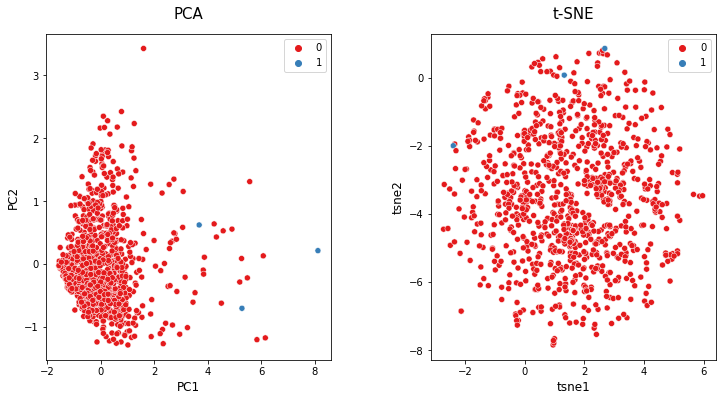

In [28]:
# Plotagem de gráfico de algoritmo que melhor desempenhou na clusterização anterior, 'Gausian Mixture'.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12 ,6))

# Plot dos gráficos
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=gm_labels, palette='Set1', ax=ax[0])
sns.scatterplot(x_tsne[:,0], x_tsne[:,1], hue=gm_labels, palette='Set1', ax=ax[1])

# Títulos
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("t-SNE", fontsize=15, pad=15)

# Nome dos eixos
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)

ax[1].set_xlabel("tsne1", fontsize=12)
ax[1].set_ylabel("tsne2", fontsize=12)

# Aumenta a separação entre os gráficos
plt.subplots_adjust(wspace = 0.35, hspace=0.35)

In [29]:
# Insere as colunas no dataset para exibição.
data['KMEANS'] = kmeans_labels
data['AC'] = ac_labels
data['GM'] = gm_labels
data['BIRCH'] = birch_labels

In [30]:
data.head(10)

,Vehicle_Title,Review,Rating,RatingCategories,Norm_Review,KMEANS,AC,GM,BIRCH
0,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,Doesn’t disappoint,5.000,Positive,disappoint,1,0,0,0
1,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,I bought mine 4/17 with 98K. Have been wantin...,3.000,Positive,buy 4/17 98k want v6 5 sp 05-'09 vintage yea...,1,0,0,0
2,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,There will always be a 05-09 mustang for sale...,5.000,Positive,05 09 mustang sale fairly reasonable purchas...,1,0,0,0
3,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I bought my car from an auction I work at ( A...,5.000,Positive,buy car auction work adesa sacramento love v...,1,0,0,0
4,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,I bought this car spankin new and i still am ...,5.000,Positive,buy car spankin new love car car hug road ...,1,0,0,0
5,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,"Lots of problems with Ford these days, sensor...",3.000,Positive,lot problem ford day sensor issue cam phaser...,1,0,0,0
6,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,Bought mine used 20k on it and have added a S...,4.625,Positive,buy 20k add sct tuner ford cai flow master m...,1,0,0,0
7,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,I bought my preowned 06 a few weeks back and ...,4.375,Positive,buy preowne 06 week glad scream yellow car u...,1,0,0,0
8,2006 Ford Mustang Coupe GT Deluxe 2dr Coupe (4...,I drive 50 miles each way to work and traded ...,3.500,Positive,drive 50 mile way work trade 01 accord 06 mu...,1,0,0,0
9,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,This car is just awesome. The 4.6L V8 makes ...,4.625,Positive,car awesome 4.6l v8 make car stock exhaust...,1,0,0,0


**Tentaremos avaliar os sentimentos de cada um dos comentários ('Review') para atestar se as avaliações ('Rating') condizeram com a avaliação concedida. A coluna 'RatingCategories' foi gerada no inicio da análise, onde 'Rating' acima de 2.5 seriam categorizadas positivamente ('Positive') e aquelas abaixo disso seriam consideradas negativamente ('Negative').**

In [31]:
nltk.download('vader_lexicon') # Base de dados VADER
sid = SentimentIntensityAnalyzer() 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
# Aplicaremos uma função lambda nas colunas de review 'regular' e normalizada.
data['SID'] = data['Review'].apply(lambda review: sid.polarity_scores(review))
data['SID_Norm'] = data['Norm_Review'].apply(lambda review: sid.polarity_scores(review))

In [33]:
data.head() # O resultado do NLTK é um dicionário que está em uma célula para cada linha do dataset.

,Vehicle_Title,Review,Rating,RatingCategories,Norm_Review,KMEANS,AC,GM,BIRCH,SID,SID_Norm
0,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,Doesn’t disappoint,5.0,Positive,disappoint,1,0,0,0,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...","{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,I bought mine 4/17 with 98K. Have been wantin...,3.0,Positive,buy 4/17 98k want v6 5 sp 05-'09 vintage yea...,1,0,0,0,"{'neg': 0.077, 'neu': 0.791, 'pos': 0.132, 'co...","{'neg': 0.111, 'neu': 0.649, 'pos': 0.24, 'com..."
2,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,There will always be a 05-09 mustang for sale...,5.0,Positive,05 09 mustang sale fairly reasonable purchas...,1,0,0,0,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...","{'neg': 0.0, 'neu': 0.728, 'pos': 0.272, 'comp..."
3,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I bought my car from an auction I work at ( A...,5.0,Positive,buy car auction work adesa sacramento love v...,1,0,0,0,"{'neg': 0.031, 'neu': 0.894, 'pos': 0.075, 'co...","{'neg': 0.054, 'neu': 0.842, 'pos': 0.104, 'co..."
4,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,I bought this car spankin new and i still am ...,5.0,Positive,buy car spankin new love car car hug road ...,1,0,0,0,"{'neg': 0.028, 'neu': 0.78, 'pos': 0.193, 'com...","{'neg': 0.0, 'neu': 0.643, 'pos': 0.357, 'comp..."


In [34]:
# Vamos colocar a saida compound desse dicionário em uma nova coluna e, para diminuir o tamanho do nosso dataset, será deletada as colunas SID e SID_Norm.
data['Compound'] = data['SID'].apply(lambda score_dict: score_dict['compound'])
data['Compound_Norm'] = data['SID_Norm'].apply(lambda score_dict: score_dict['compound'])
data = data.drop(columns=['SID', 'SID_Norm'])
data.head()

,Vehicle_Title,Review,Rating,RatingCategories,Norm_Review,KMEANS,AC,GM,BIRCH,Compound,Compound_Norm
0,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,Doesn’t disappoint,5.0,Positive,disappoint,1,0,0,0,-0.4019,-0.4019
1,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,I bought mine 4/17 with 98K. Have been wantin...,3.0,Positive,buy 4/17 98k want v6 5 sp 05-'09 vintage yea...,1,0,0,0,0.6371,0.8885
2,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,There will always be a 05-09 mustang for sale...,5.0,Positive,05 09 mustang sale fairly reasonable purchas...,1,0,0,0,0.6249,0.6249
3,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I bought my car from an auction I work at ( A...,5.0,Positive,buy car auction work adesa sacramento love v...,1,0,0,0,0.6331,0.4588
4,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,I bought this car spankin new and i still am ...,5.0,Positive,buy car spankin new love car car hug road ...,1,0,0,0,0.9339,0.9313


In [35]:
# Criaremos uma regra simples para transformar os valores dos compounds em uma avaliação positiva ou negativa:
data['Review_VADER'] = data['Compound'].apply(lambda c: 'Positive' if c >=0 else 'Negative')
data['ReviewNorm_VADER'] = data['Compound_Norm'].apply(lambda c: 'Positive' if c >=0 else 'Negative')

              precision    recall  f1-score   support

    Negative       0.20      0.57      0.29        40
    Positive       0.98      0.90      0.94       960

    accuracy                           0.89      1000
   macro avg       0.59      0.74      0.62      1000
weighted avg       0.95      0.89      0.91      1000



<Figure size 1080x360 with 0 Axes>

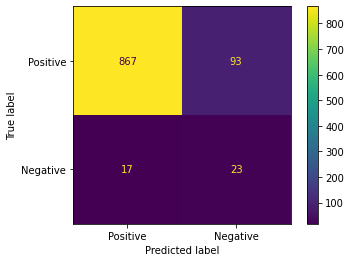

In [36]:
# Primeiramente será gerada a matrix de confusão com as reviews regulares.
cm = confusion_matrix(data['RatingCategories'], data['Review_VADER'], labels = ['Positive','Negative'])

# Plotando uma figura com a matriz de confusão
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

print(classification_report(data['RatingCategories'],data['Review_VADER']))

              precision    recall  f1-score   support

    Negative       0.21      0.55      0.30        40
    Positive       0.98      0.91      0.94       960

    accuracy                           0.90      1000
   macro avg       0.59      0.73      0.62      1000
weighted avg       0.95      0.90      0.92      1000



<Figure size 1080x360 with 0 Axes>

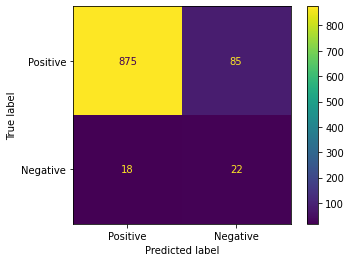

In [37]:
# E agora com as review normalizadas.
cm = confusion_matrix(data['RatingCategories'], data['ReviewNorm_VADER'], labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

print(classification_report(data['RatingCategories'],data['ReviewNorm_VADER']))

Conclui-se que, aplicando o VADER em um texto normalizado, proporciona uma acurácia ligeiramente melhor (1%), e que na categorização inicial da coluna 'Rating' (expressa na coluna 'RatingCategories') o resultado foi 90% condizente com o comentário ('Review').

**Aplicando um algoritmo de classificação sem a utilização do VADER e análise de sentimentos:**

In [38]:
# Dividindo x e y
x = data['Norm_Review'] # Desta maneira, foram ignoradas as colunas que não seriam utilizadas.
y = data['RatingCategories'].values  # Classe alvo.

# Dividindo dados para treino e dados para teste.
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [39]:
#Criando a matriz com os dados de teste.
x_train_bag = cv.fit_transform(x_train)

In [40]:
# Modelo de Regressão Logistica (Linear SVC).
LSVC = LinearSVC()
LSVC.fit(x_train_bag, y_train) # Treino do modelo.

LinearSVC()

In [41]:
# Primeiro necessita-se dos embbedings do X de teste.
X_test_bag = cv.transform(x_test)
X_test_bag.shape

(300, 4476)

In [42]:
# Previsões utilizando o modelo treinado anteriormente.
y_pred_bag = LSVC.predict(X_test_bag)
y_pred_bag

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

<Figure size 1080x360 with 0 Axes>

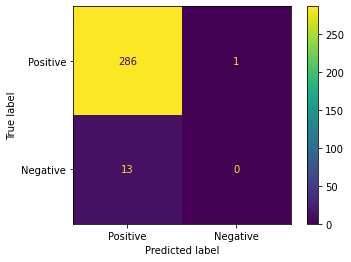

In [43]:
# Plotando uma figura com a matriz de confusão
cm_reglog = confusion_matrix(y_test, y_pred_bag, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

In [44]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred_bag)) # O algoritmo de classificação 'Linear SVC' utilizado, obtiverá uma acurácia de 95%. 
report_cv = classification_report(y_test, y_pred_bag, output_dict=True)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.95       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.95      0.93       300



**Realizando uma nova rodada de testes com o Term Frequency Inverse Document Frequency (TFIDF) em condições equivalentes ao Count Vectorizer**

In [45]:
tfidf = TfidfVectorizer(max_features = 4500) # Modelo TFIDF.

In [46]:
#Criando a matriz com os dados de teste.
x_train_bag = tfidf.fit_transform(x_train)

In [47]:
LSVC.fit(x_train_bag, y_train) # Treino do modelo de classificação.

LinearSVC()

In [48]:
# Embbedings do X de teste.
X_test_bag = tfidf.transform(x_test)

In [49]:
# Previsões utilizando o modelo treinado anteriormente.
y_pred_bag = LSVC.predict(X_test_bag)

<Figure size 1080x360 with 0 Axes>

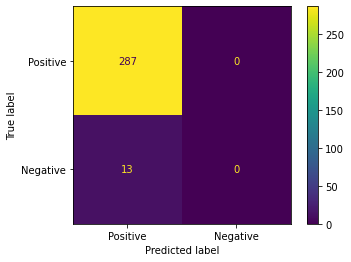

In [50]:
# Plotando uma figura com a matriz de confusão
cm_reglog = confusion_matrix(y_test, y_pred_bag, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

In [51]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred_bag)) # Com uma simples alteração no modelo de conversão de texto para número, obtivemos um acrescimo de 1%
# na métrica de acurácia.
report_tfidf = classification_report(y_test, y_pred_bag, output_dict=True)

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [52]:
print(f"Acurácia do algoritmo de classificação 'Linear SVC' :\nCount Vectorizer = {report_cv['accuracy']:.2f} | TFIDF = {report_tfidf['accuracy']:.2f}")

Acurácia do algoritmo de classificação 'Linear SVC' :
Count Vectorizer = 0.95 | TFIDF = 0.96


**Utilizando alguns outros algoritmos de classificação.**

Para essa etapa, não será customizado nenhum dos parâmetros dos modelos e nenhuma técnica de tranformação de escala (não há necessidade).

Count Vectorizer: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300

TFIDF: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

<Figure size 1080x360 with 0 Axes>

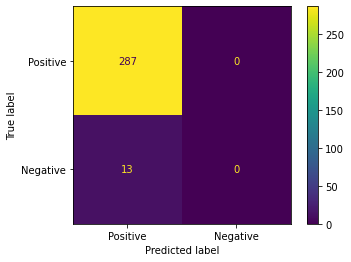

<Figure size 1080x360 with 0 Axes>

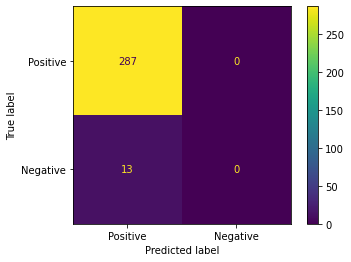

In [53]:
# KNeighbors (KNN)
# Utilizando Count Vectorizer
KNN_CV = KNeighborsClassifier() # Cria-se o classificador.
x_train_bag_cv = cv.fit_transform(x_train) 
X_test_bag_cv = cv.transform(x_test) 

KNN_CV.fit(x_train_bag_cv, y_train) # Treino do modelo.
y_pred_bag_cv = KNN_CV.predict(X_test_bag_cv) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_cv = confusion_matrix(y_test, y_pred_bag_cv, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_cv, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Utilizando TFIDF
KNN_TFIDF = KNeighborsClassifier() # Cria-se o classificador.

x_train_bag_tfidf = tfidf.fit_transform(x_train) 
X_test_bag_tfidf = tfidf.transform(x_test) 

KNN_TFIDF.fit(x_train_bag_tfidf, y_train) # Treino do modelo.
y_pred_bag_tfidf = KNN_TFIDF.predict(X_test_bag_tfidf) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_tfidf = confusion_matrix(y_test, y_pred_bag_tfidf, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_tfidf, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Resultados/Relatório
print('Count Vectorizer: \n', classification_report(y_test, y_pred_bag_cv))
print('TFIDF: \n', classification_report(y_test, y_pred_bag_tfidf))

# OBS: O primeiro gráfico é referente ao Count Vectorizer, já o segundo é refente ao TFIDF.

Count Vectorizer: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.95       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.95      0.93       300

TFIDF: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1080x360 with 0 Axes>

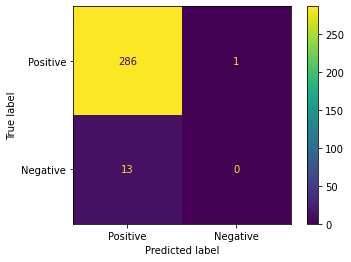

<Figure size 1080x360 with 0 Axes>

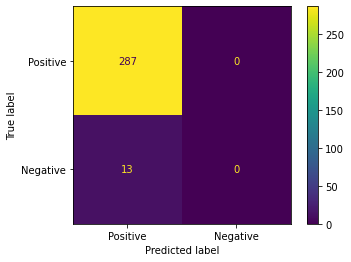

In [54]:
# Logistic Regression
# Utilizando Count Vectorizer
LR_CV = LogisticRegression() # Cria-se o classificador.
x_train_bag_cv = cv.fit_transform(x_train) 
X_test_bag_cv = cv.transform(x_test) 

LR_CV.fit(x_train_bag_cv, y_train) # Treino do modelo.
y_pred_bag_cv = LR_CV.predict(X_test_bag_cv) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_cv = confusion_matrix(y_test, y_pred_bag_cv, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_cv, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Utilizando TFIDF
LR_TFIDF = LogisticRegression() # Cria-se o classificador.

x_train_bag_tfidf = tfidf.fit_transform(x_train) 
X_test_bag_tfidf = tfidf.transform(x_test) 

LR_TFIDF.fit(x_train_bag_tfidf, y_train) # Treino do modelo.
y_pred_bag_tfidf = LR_TFIDF.predict(X_test_bag_tfidf) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_tfidf = confusion_matrix(y_test, y_pred_bag_tfidf, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_tfidf, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Resultados/Relatório
print('Count Vectorizer: \n', classification_report(y_test, y_pred_bag_cv))
print('TFIDF: \n', classification_report(y_test, y_pred_bag_tfidf))

Count Vectorizer: 
               precision    recall  f1-score   support

    Negative       0.10      0.08      0.09        13
    Positive       0.96      0.97      0.96       287

    accuracy                           0.93       300
   macro avg       0.53      0.52      0.53       300
weighted avg       0.92      0.93      0.93       300

TFIDF: 
               precision    recall  f1-score   support

    Negative       0.22      0.15      0.18        13
    Positive       0.96      0.98      0.97       287

    accuracy                           0.94       300
   macro avg       0.59      0.56      0.58       300
weighted avg       0.93      0.94      0.93       300



<Figure size 1080x360 with 0 Axes>

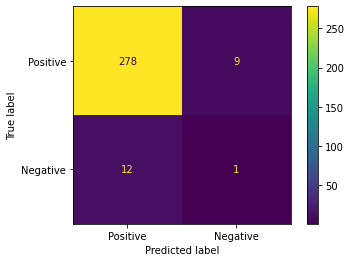

<Figure size 1080x360 with 0 Axes>

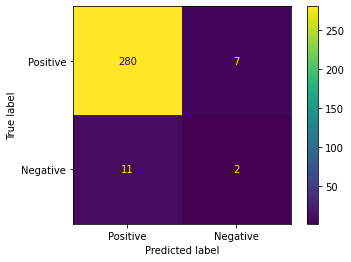

In [55]:
# Decision Tree
# Utilizando Count Vectorizer
DTC_CV = DecisionTreeClassifier() # Cria-se o classificador.
x_train_bag_cv = cv.fit_transform(x_train) 
X_test_bag_cv = cv.transform(x_test) 

DTC_CV.fit(x_train_bag_cv, y_train) # Treino do modelo.
y_pred_bag_cv = DTC_CV.predict(X_test_bag_cv) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_cv = confusion_matrix(y_test, y_pred_bag_cv, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_cv, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Utilizando TFIDF
DTC_TFIDF = DecisionTreeClassifier() # Cria-se o classificador.

x_train_bag_tfidf = tfidf.fit_transform(x_train) 
X_test_bag_tfidf = tfidf.transform(x_test) 

DTC_TFIDF.fit(x_train_bag_tfidf, y_train) # Treino do modelo.
y_pred_bag_tfidf = DTC_TFIDF.predict(X_test_bag_tfidf) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_tfidf = confusion_matrix(y_test, y_pred_bag_tfidf, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_tfidf, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Resultados/Relatório
print('Count Vectorizer: \n', classification_report(y_test, y_pred_bag_cv))
print('TFIDF: \n', classification_report(y_test, y_pred_bag_tfidf))

Count Vectorizer: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300

TFIDF: 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        13
    Positive       0.96      1.00      0.98       287

    accuracy                           0.96       300
   macro avg       0.48      0.50      0.49       300
weighted avg       0.92      0.96      0.94       300



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

<Figure size 1080x360 with 0 Axes>

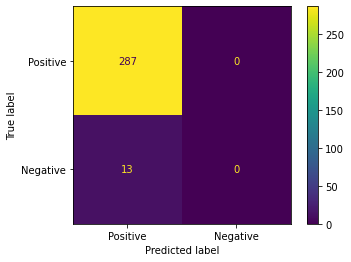

<Figure size 1080x360 with 0 Axes>

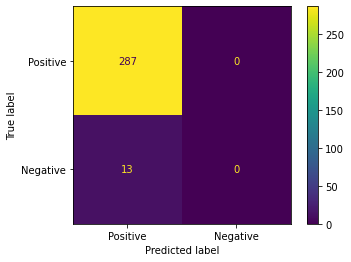

In [56]:
# Random Forest
# Utilizando Count Vectorizer
RFC_CV = RandomForestClassifier() # Cria-se o classificador.
x_train_bag_cv = cv.fit_transform(x_train) 
X_test_bag_cv = cv.transform(x_test) 

RFC_CV.fit(x_train_bag_cv, y_train) # Treino do modelo.
y_pred_bag_cv = RFC_CV.predict(X_test_bag_cv) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_cv = confusion_matrix(y_test, y_pred_bag_cv, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_cv, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Utilizando TFIDF
RFC_TFIDF = RandomForestClassifier() # Cria-se o classificador.

x_train_bag_tfidf = tfidf.fit_transform(x_train) 
X_test_bag_tfidf = tfidf.transform(x_test) 

RFC_TFIDF.fit(x_train_bag_tfidf, y_train) # Treino do modelo.
y_pred_bag_tfidf = RFC_TFIDF.predict(X_test_bag_tfidf) # Previsões utilizando o modelo treinado anteriormente.

cm_reglog_tfidf = confusion_matrix(y_test, y_pred_bag_tfidf, labels = ['Positive','Negative'])

figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_reglog_tfidf, display_labels=['Positive','Negative'])
disp.plot(values_format='d') 

# Resultados/Relatório
print('Count Vectorizer: \n', classification_report(y_test, y_pred_bag_cv))
print('TFIDF: \n', classification_report(y_test, y_pred_bag_tfidf))

Desta maneira, constata-se que os algoritmos de classificação utilizados nessa análise se mantém em uma acurácia similar, com uma margem de erro em torno de 2%. Dentre eles, o algoritmo de 'Decision Tree' foi o que teve um desempenho ligeiramente inferior (acurárias de CV: 0.93 e TFIDF: 0.94).